In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics

df = pd.read_csv('diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [2]:
X = df.drop('diabetes', axis=1)  # Features
y = df['diabetes']  # Target variable

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape (X, y):", X_train.shape, y_train.shape)
print("Testing set shape (X, y):", X_test.shape, y_test.shape)

Training set shape (X, y): (80000, 8) (80000,)
Testing set shape (X, y): (20000, 8) (20000,)


Logistic Regression: Predicting yes/no outcomes, like if a fruit is ripe or not. (what we will use today !)

It predicts the probability of occurrence of an event by fitting data to a logistic curve. It is widely used for classification problems where the outcomes are discrete (e.g., yes/no, 0/1).

In [3]:
# Identify the numerical columns that need standardization
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training set
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Transform the test set using the same scaler
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

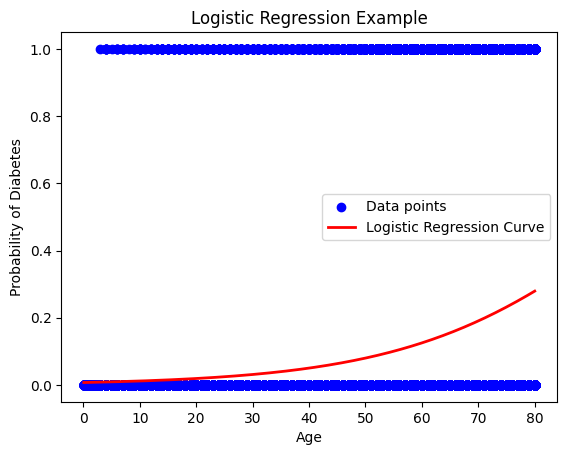

In [4]:
# Extract features (X) and target variable (y)
X = df['age'].values.reshape(-1, 1)
y = df['diabetes']

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Make predictions on a test set
X_test = np.linspace(df['age'].min(), df['age'].max(), 300).reshape(-1, 1)
y_prob = model.predict_proba(X_test)[:, 1]

# Plotting the results
plt.scatter(X, y, color='blue', label='Data points')  # plot the data points
plt.plot(X_test, y_prob, color='red', linewidth=2, label='Logistic Regression Curve')  # plot the logistic regression curve
plt.xlabel('Age')
plt.ylabel('Probability of Diabetes')
plt.title('Logistic Regression Example')
plt.legend()
plt.show()


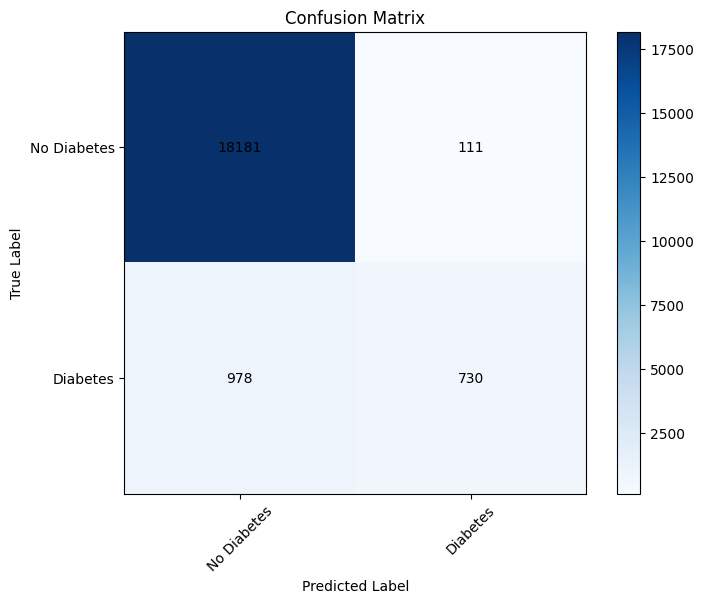

In [5]:
# Extract features (X) and target variable (y)
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define transformers for numerical and categorical features
numeric_features = X.select_dtypes(include=['float64']).columns
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with preprocessing and logistic regression
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['No Diabetes', 'Diabetes']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center')

plt.show()


In [6]:
def plot_decision_boundary(X, y, model, numeric_columns):
    h = 0.02  # Step size in the mesh

    if len(numeric_columns) == 2:
        x_min, x_max = X[numeric_columns[0]].min() - 1, X[numeric_columns[0]].max() + 1
        y_min, y_max = X[numeric_columns[1]].min() - 1, X[numeric_columns[1]].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
        plt.scatter(X[numeric_columns[0]], X[numeric_columns[1]], c=y, cmap=plt.cm.Paired)
        plt.xlabel(numeric_columns[0])
        plt.ylabel(numeric_columns[1])
        plt.title('Decision Boundary')
        plt.show()
    else:
        print("Cannot visualize decision boundary with more than two features.")

# Assuming you have already trained the model and have X_test, y_test, and numeric_columns
plot_decision_boundary(X_test, y_test, model, numeric_columns)


NameError: name 'numeric_columns' is not defined

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


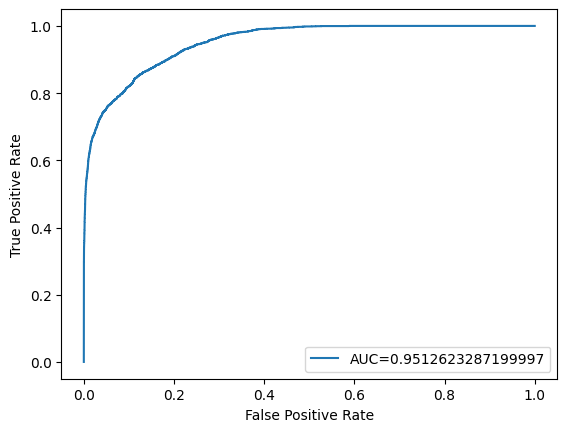

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Assuming your DataFrame is named 'df'
X = df[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
y = df['diabetes']

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Instantiate the model
log_regression = LogisticRegression()

# Fit the model using the training data
log_regression.fit(X_train, y_train)

# Define metrics
y_pred_proba = log_regression.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Create ROC curve
plt.plot(fpr, tpr, label="AUC=" + str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()